# CS235 Fall 2024 Course Project

Name: Joshua Pulido, Allan Peh

Student ID: 862476702, 862007781

## Introduction
In this project, a number of data
mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [3]:
%matplotlib inline


import itertools, collections
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors



from ucimlrepo import fetch_ucirepo


In [4]:

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# # Metadata
# print(breast_cancer_wisconsin_diagnostic.metadata)

X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


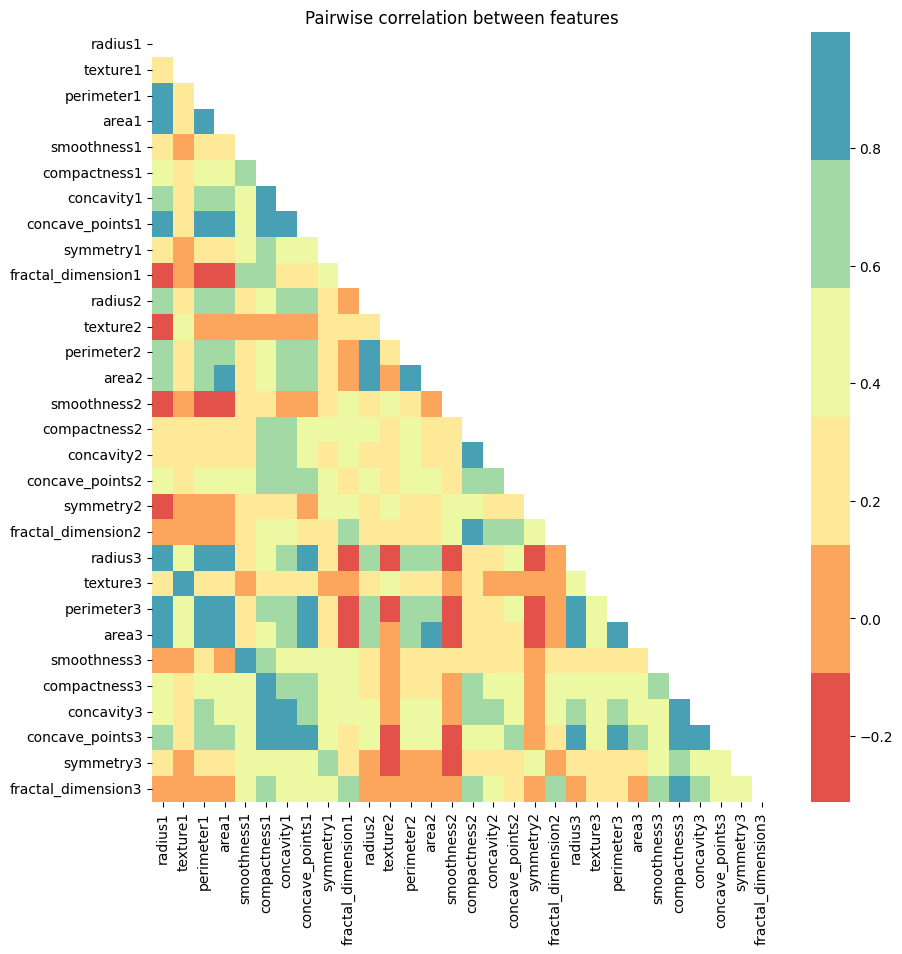

In [6]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

In [7]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


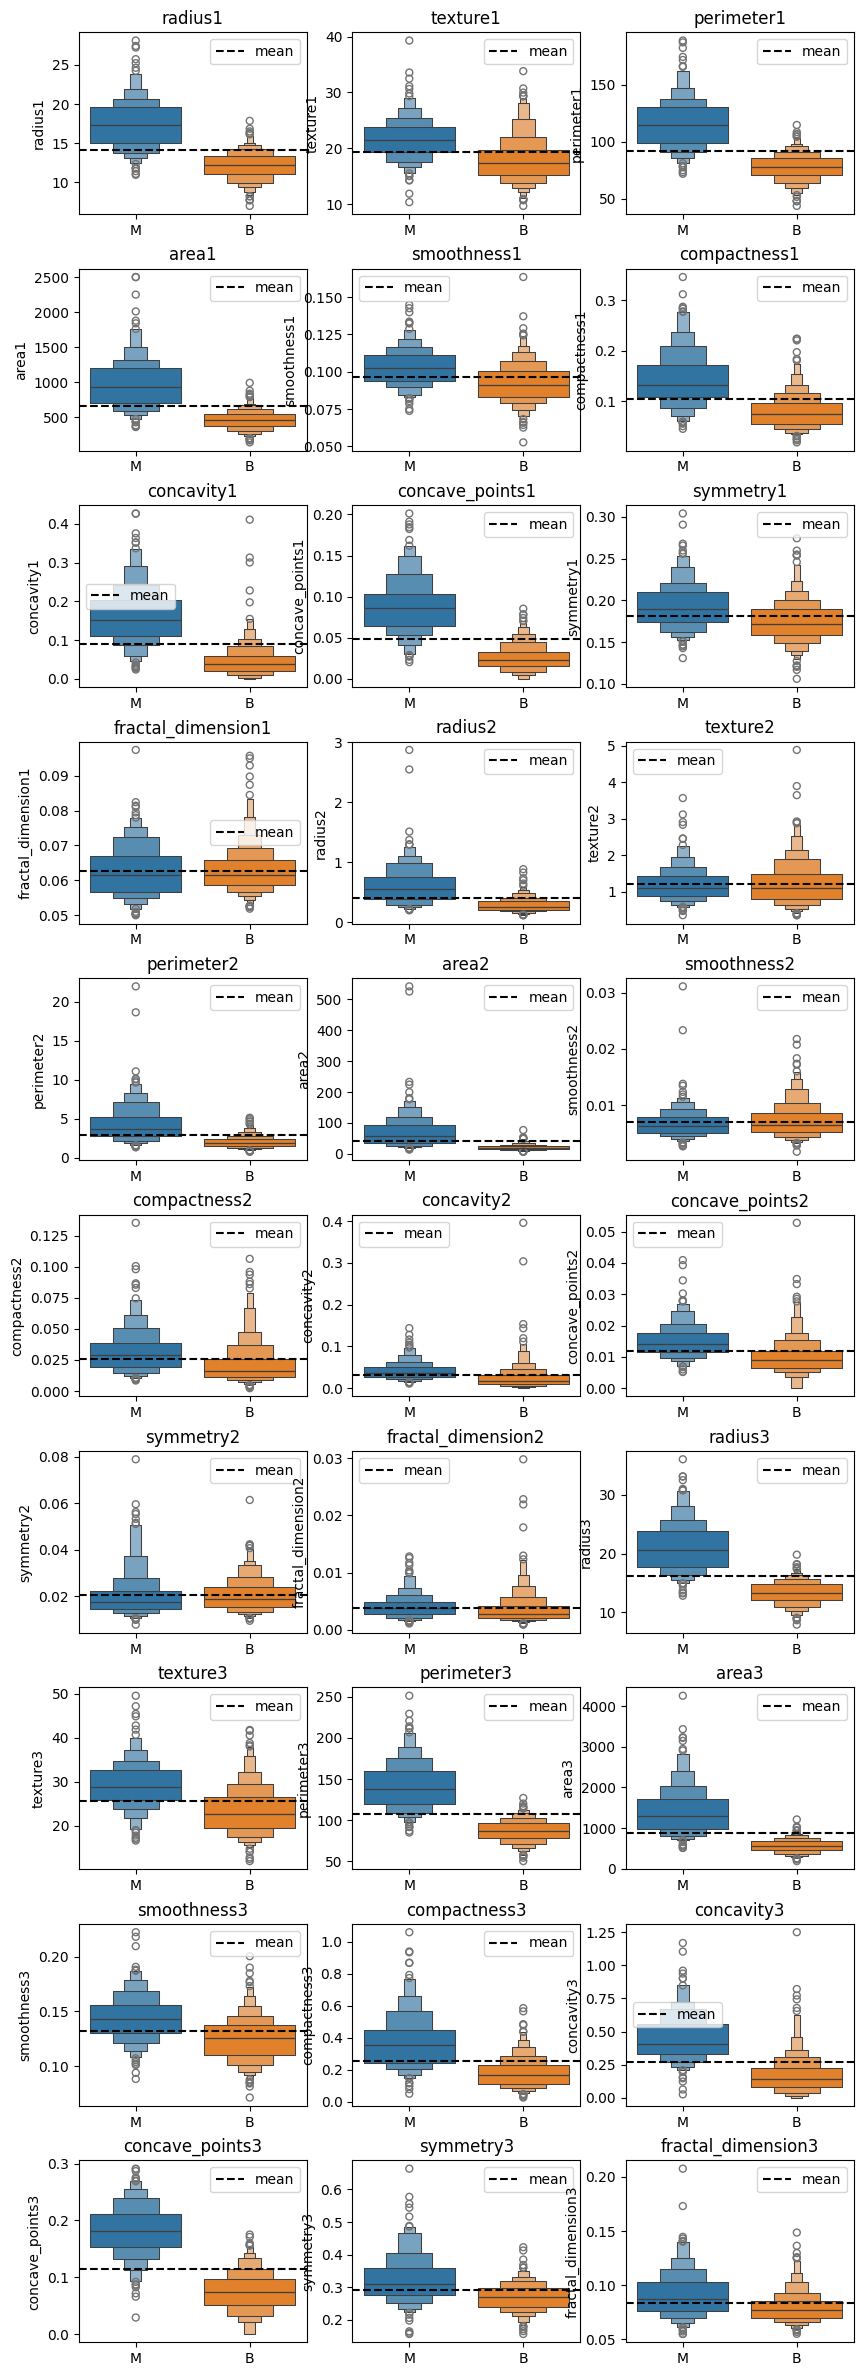

In [8]:
plt.figure(figsize=(10,30))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(10,3,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


In [10]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [11]:
# Node class for the decision tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

# Decision tree class
class DecisionTree:
    def __init__(self, max_depth=12, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self.grow_tree(X, y)

    # Grow tree recursively
    def grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Stopping condition
        if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Select the best feature
        best_feature, best_gain, best_threshold = self._best_split(X, y)
        
        if best_gain == 0 or best_feature is None or best_threshold is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
       #split data
        X_left, X_right, y_left, y_right = self._split(X, y, best_feature, best_threshold)

        if len(y_left) == 0 or len(y_right) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Recursively grow left and right children
        left_child = self.grow_tree(X_left, y_left, depth + 1)
        right_child = self.grow_tree(X_right, y_right, depth + 1)
        return Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _split(self, X, y, feature, threshold):
        feature_values = X[:, feature]
        left_indices = feature_values <= threshold
        right_indices = feature_values > threshold

        return X[left_indices], X[right_indices], y[left_indices], y[right_indices]
    
    def _best_split(self, X, y):
        best_feature, best_threshold,best_gain = None, None, 0

        #Try to optimize this later
        for feature in range(X.shape[1]):
            feature_values = X[:, feature]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                gain = self.information_gain(X, y, feature, threshold)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_gain, best_threshold

    def _best_feature(self, X, y):
        # Calculate information gain for all features
        gains = [self.information_gain(X, y, i) for i in range(X.shape[1])]
        return np.argmax(gains)

    def information_gain(self, X, y, feature, threshold):
        if threshold is None:
            return 0
        
        feature_values = X[:, feature]
        left_split = y[feature_values <= threshold] #compared to threshold
        right_split = y[feature_values > threshold]

        if len(left_split) == 0 or len(right_split) == 0:
            return 0
        
        total_entropy = self.entropy(y)
        weighted_entropy = (len(left_split) / len(y)) * self.entropy(left_split) + (len(right_split) / len(y)) * self.entropy(right_split)
        
        return total_entropy - weighted_entropy

    def entropy(self, y):
        class_labels, counts = np.unique(y, return_counts=True)
        entropy_value = -np.sum([(count / len(y)) * np.log2(count / len(y)) for count in counts])
        return entropy_value

    def _most_common_label(self, y):
        labels, counts = np.unique(y, return_counts=True)
        return labels[np.argmax(counts)]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node): 
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)





In [20]:
## Naive Bayes 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
class NaiveBayes:
    def fit(self, x, y):
        y = y['Diagnosis']
        
        self.classes = np.unique(y)
        self.parameters = {}
                
        for c in self.classes:
            x_c = x[y == c]
            self.parameters[c] = {
                'mean': x_c.mean(axis = 0),
                'var': x_c.var(axis = 0),
                'prior': x_c.shape[0]/x.shape[0]
            }
    
    def gaussian(self, x, mean, var):
        stdv = np.sqrt(var)
        exp = np.exp((-(x-mean)**2)/(2 * var))
        coeff = 1/(np.sqrt(2 * np.pi * var))
        return exp * coeff
    
    
    def predict(self, X):
        predictions = []
        for _, x in X.iterrows(): 
            posteriors = []
            for c in self.classes:
                posterior = self.parameters[c]['prior']  
                for feature_name in X.columns:
                    mean = self.parameters[c]['mean'][feature_name]
                    var = self.parameters[c]['var'][feature_name]
                    posterior *= self.gaussian(x[feature_name], mean, var)
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DT
tree_model = DecisionTree(max_depth=12, min_samples_split=2)
tree_model.fit(X_train.values, y_train.values)# Convert DataFrames to NumPy arrays

nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test.values)
y_pred_nb = nb.predict(X_test)

# Calculate the F1 score
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Decision Tree F1 Score:", f1_tree)
print("Naive Bayes F1 Score:", f1_nb)


Decision Tree F1 Score: 0.9298245614035088
Naive Bayes F1 Score: 0.9647382344750765


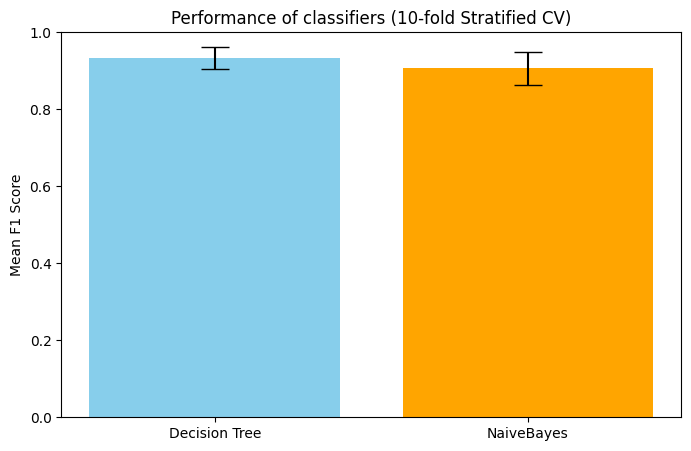

Decision Tree Mean F1 Score: 0.9330079136081466
Decision Tree Standard Deviation of F1 Score: 0.027746720910896104
Naive Bayes Mean F1 Score: 0.9061018287275117
Naive Bayes Standard Deviation of F1 Score: 0.04364163273940991


In [19]:
# Function to perform 10-fold cross-validation and plot F1 score
def evaluate_and_plot(model, X, y, n_splits=10):
    # Convert X and y to NumPy arrays
    X = X.values if hasattr(X, 'values') else X
    y = y.values if hasattr(y, 'values') else y

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []

    # Perform cross-validation
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on the test fold
        y_pred = model.predict(X_test)
        
        # Calculate F1 score for this fold
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

    # Calculate mean and standard deviation of F1 scores
    mean_f1 = np.mean(f1_scores)  
    std_f1 = np.std(f1_scores)
    
    return mean_f1, std_f1

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    nb.fit(X_train, y_train)
    
    # Make predictions
    y_pred = nb.predict(X_test)
    
    # Calculate F1 score and append to list
    f1 = f1_score(y_test, y_pred, pos_label="M")  # Assuming "M" is the positive class
    f1_scores.append(f1)

# printing functions
tree_model = DecisionTree(max_depth=12, min_samples_split=2)
mean_f1_tree, std_f1_tree = evaluate_and_plot(tree_model, X, y)

# Calculate the mean and standard deviation of F1 scores
mean_f1_nb = np.mean(f1_scores)
std_f1_nb = np.std(f1_scores)

# Plot F1 scores with mean and standard deviation
plt.figure(figsize=(8, 5))
plt.bar(['Decision Tree'], [mean_f1_tree], yerr=[std_f1_tree], capsize=10, color='skyblue')
plt.bar(['NaiveBayes'], mean_f1_nb, yerr=std_f1_nb, capsize = 10, color = 'orange')
plt.ylabel('Mean F1 Score')
plt.title(f'Performance of classifiers (10-fold Stratified CV)')
plt.ylim(0, 1)
plt.show()

print(f"Decision Tree Mean F1 Score: {mean_f1_tree}")
print(f"Decision Tree Standard Deviation of F1 Score: {std_f1_tree}")
print(f"Naive Bayes Mean F1 Score: {mean_f1_nb}")
print(f"Naive Bayes Standard Deviation of F1 Score: {std_f1_nb}")

## Q2 - Dimensionality reduction with the Singular Value Decomposition

In [21]:
from numpy.linalg import svd

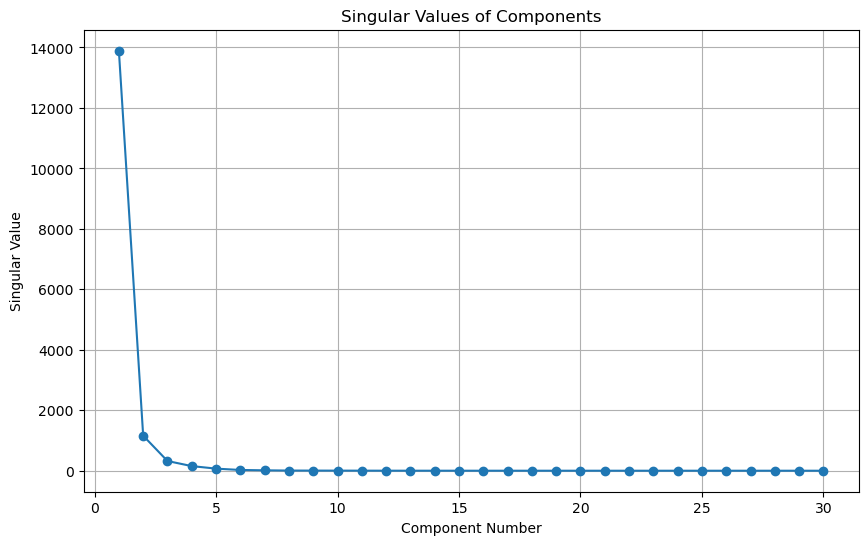

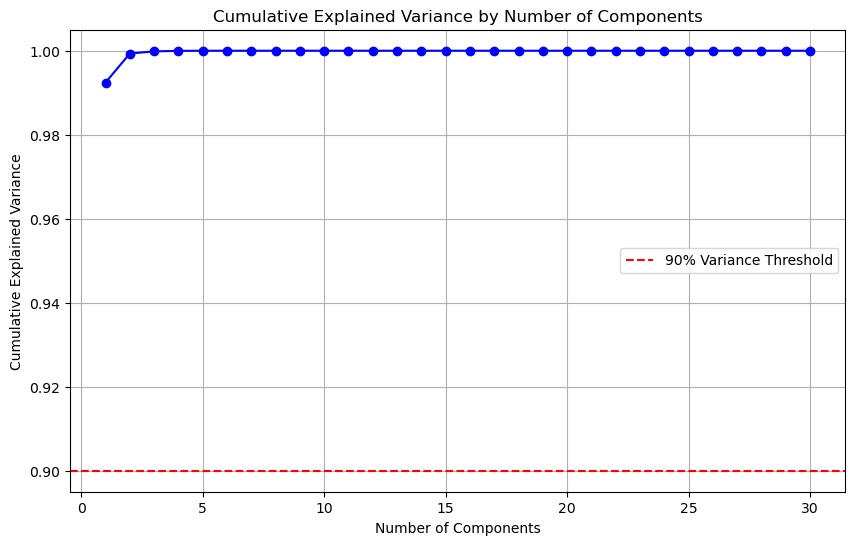

In [1141]:
from scipy.linalg import svd
U, s, VT = svd(X_test)

# Plotting Singular Values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(s) + 1), s, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Singular Value')
plt.title('Singular Values of Components')
plt.grid(True)
plt.show()

# Plotting Cumulative Explained Variance
# Not sure about this plot? will touch back on this.
explained_variance_ratio = s**2 / np.sum(s**2) 
cumulative_variance = np.cumsum(explained_variance_ratio)  

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(s) + 1), cumulative_variance, marker='o', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance Threshold")
plt.legend()
plt.show()

## Q3 - Feature selection with randomization

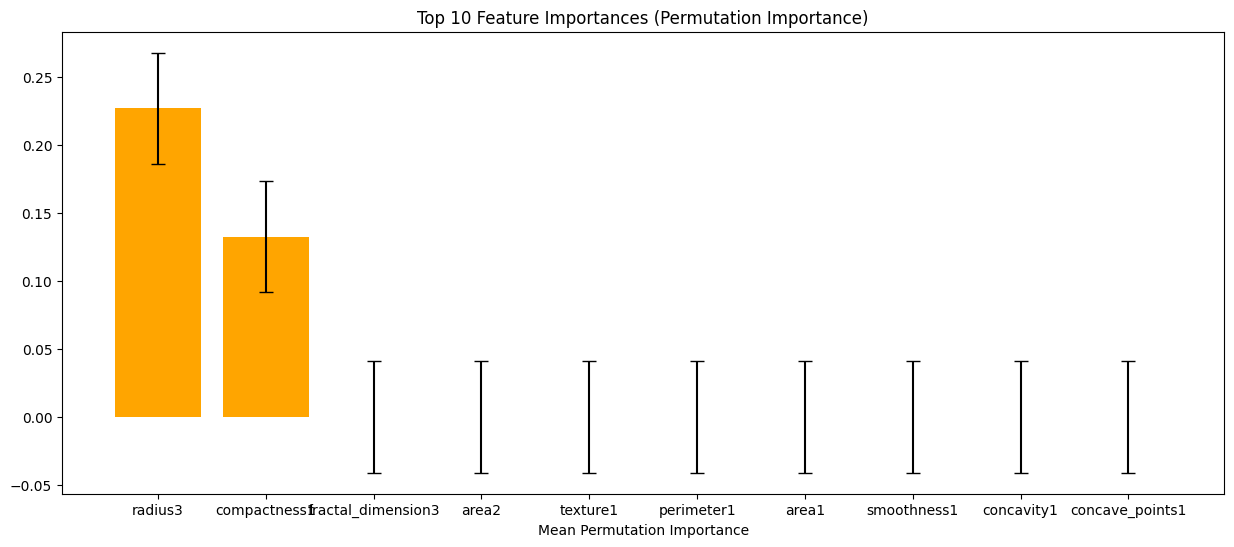

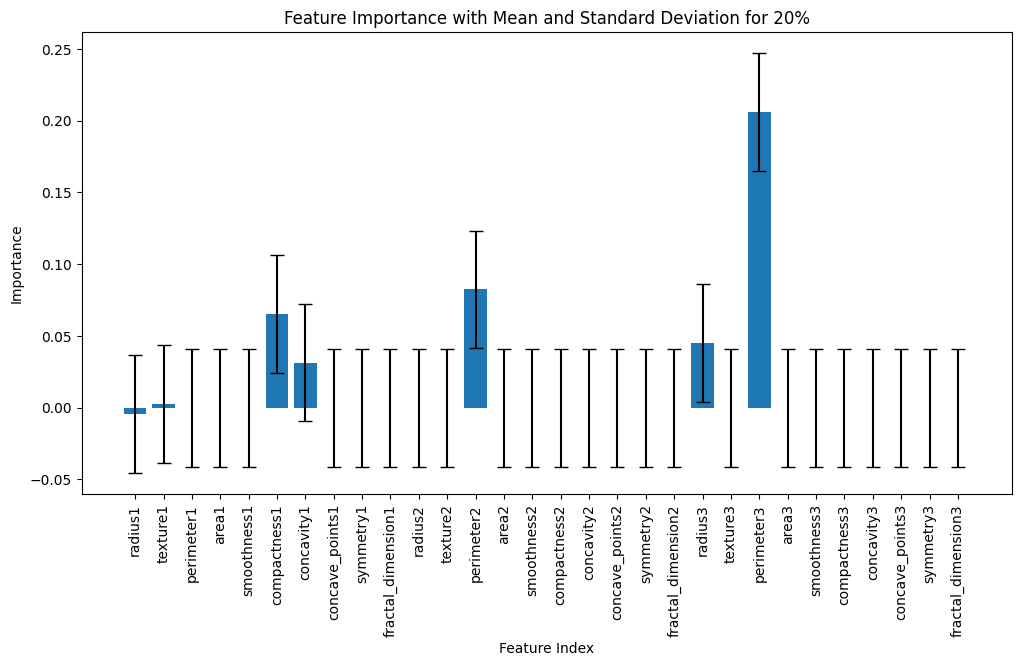

Mean Feature Importance at 20%: 0.014293699095866511
Standard Deviation of Feature Importance at 20%: 0.041020357547441266


In [32]:
# part 3 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.inspection import permutation_importance


def feature_selection_evaluation(X, y, model, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average='weighted')
    
    feature_importances = np.zeros(X.shape[1])
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        model.fit(X_train, y_train)
        
        # Calculate feature importance using permutation importance
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring=f1_scorer)
        feature_importances += result.importances_mean
    
    # Average the feature importances over the folds
    feature_importances /= n_splits
    
    # Calculate mean and standard deviation of feature importances
    mean_importance = np.mean(feature_importances)
    std_importance = np.std(feature_importances)
    
    
    sorted_idx = result.importances_mean.argsort()[::-1][:10]
    
    #plot the 10 features
    plt.figure(figsize=(15, 6))
    plt.bar([X.columns[i] for i in sorted_idx], result.importances_mean[sorted_idx], yerr = std_importance, capsize = 5, color = "orange")
    plt.xlabel("Mean Permutation Importance")
    plt.title("Top 10 Feature Importances (Permutation Importance)")
    plt.show()
    
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(feature_importances)), feature_importances, yerr=std_importance, capsize=5)
    plt.xlabel("Feature Index")
    plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
    plt.ylabel("Importance")
    plt.title("Feature Importance with Mean and Standard Deviation for 20%")
    plt.show()
    
    return feature_importances, mean_importance, std_importance

X_eighty, X_twenty, y_eighty, y_twenty = train_test_split(X, y, test_size=0.2, random_state=42)
feature_importances_twenty, mean_importance_twenty, std_importance_twenty = feature_selection_evaluation(X_twenty, y_twenty, tree_model,5)

print(f"Mean Feature Importance at 20%: {mean_importance_twenty}")
print(f"Standard Deviation of Feature Importance at 20%: {std_importance_twenty}")
# print(f"Mean Feature Importance: {mean_importance_eighty}")
# print(f"Standard Deviation of Feature Importance: {std_importance_eighty}")

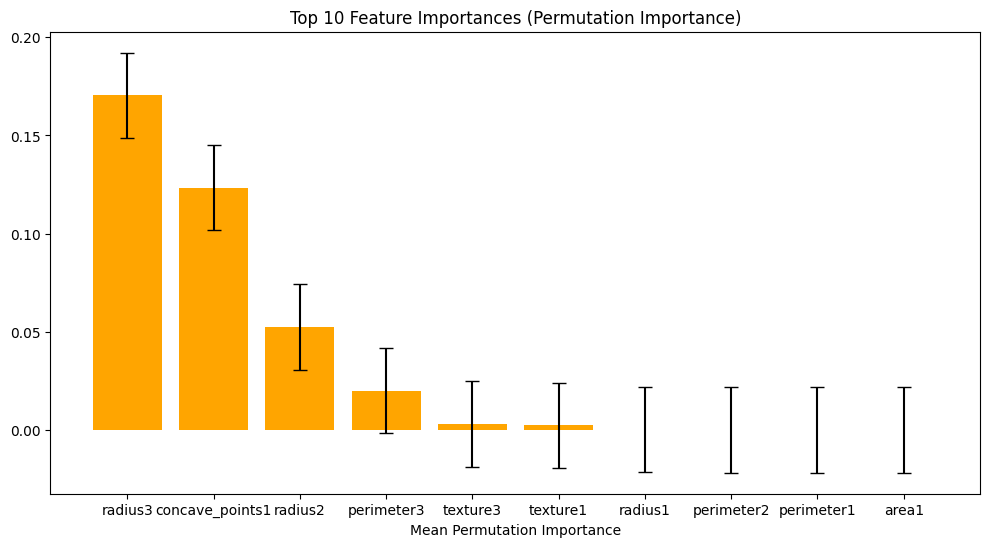

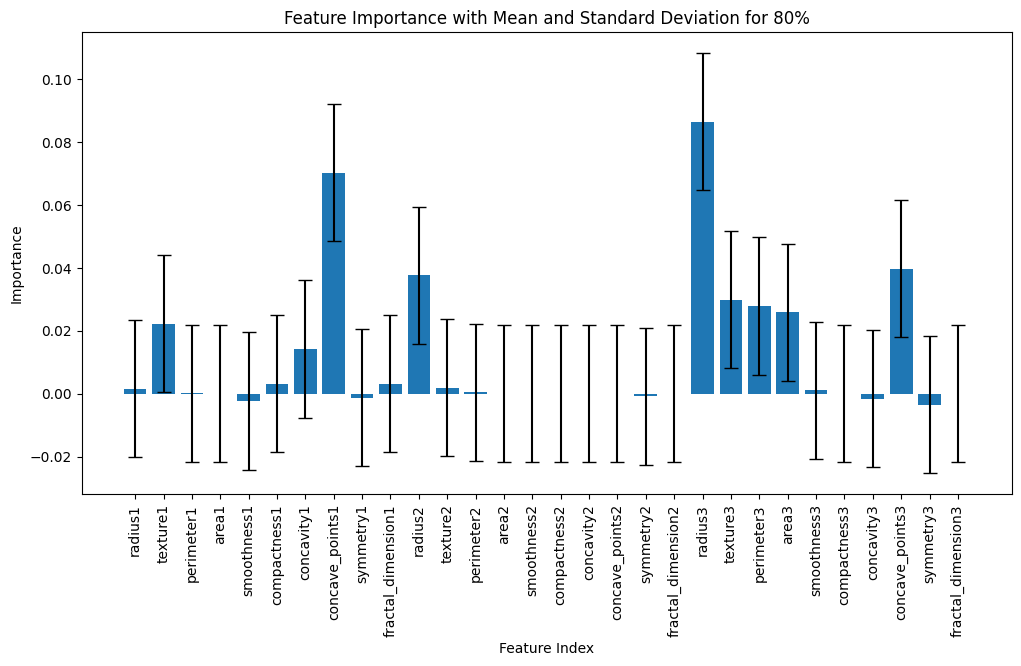

Mean Feature Importance at 80%: 0.01185999480983066
Standard Deviation of Feature Importance at 80%: 0.021794065196687036


In [33]:
def feature_selection_evaluation(X, y, model, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average='weighted')
    
    feature_importances = np.zeros(X.shape[1])
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        model.fit(X_train, y_train)
        
        # Calculate feature importance using permutation importance
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring=f1_scorer)
        feature_importances += result.importances_mean
    
    # Average the feature importances over the folds
    feature_importances /= n_splits
    
    # Calculate mean and standard deviation of feature importances
    mean_importance = np.mean(feature_importances)
    std_importance = np.std(feature_importances)
    
    sorted_idx = result.importances_mean.argsort()[::-1][:10]
    
    # plot the 10 features
    plt.figure(figsize=(12, 6))
    plt.bar([X.columns[i] for i in sorted_idx], result.importances_mean[sorted_idx], yerr = std_importance, capsize = 5, color = "orange")
    plt.xlabel("Mean Permutation Importance")
    plt.title("Top 10 Feature Importances (Permutation Importance)")
    plt.show()
    
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(feature_importances)), feature_importances, yerr=std_importance, capsize=5)
    plt.xlabel("Feature Index")
    plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
    plt.ylabel("Importance")
    plt.title("Feature Importance with Mean and Standard Deviation for 80%")
    plt.show()
    
    return feature_importances, mean_importance, std_importance


feature_importances_eighty, mean_importance_eighty, std_importance_eighty = feature_selection_evaluation(X_eighty, y_eighty, tree_model,10)        
print(f"Mean Feature Importance at 80%: {mean_importance_eighty}")
print(f"Standard Deviation of Feature Importance at 80%: {std_importance_eighty}")

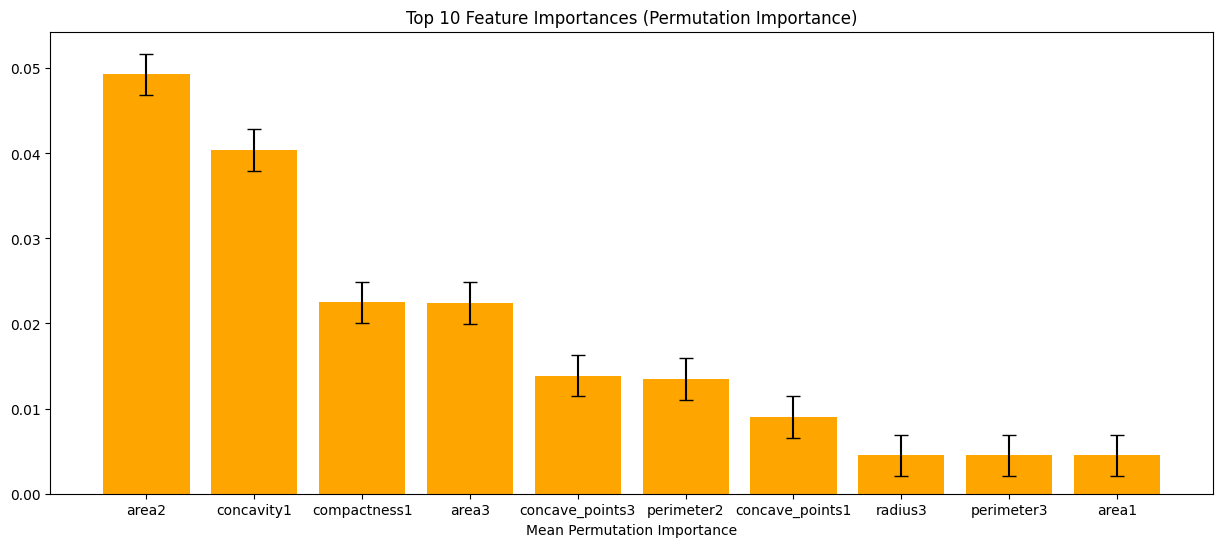

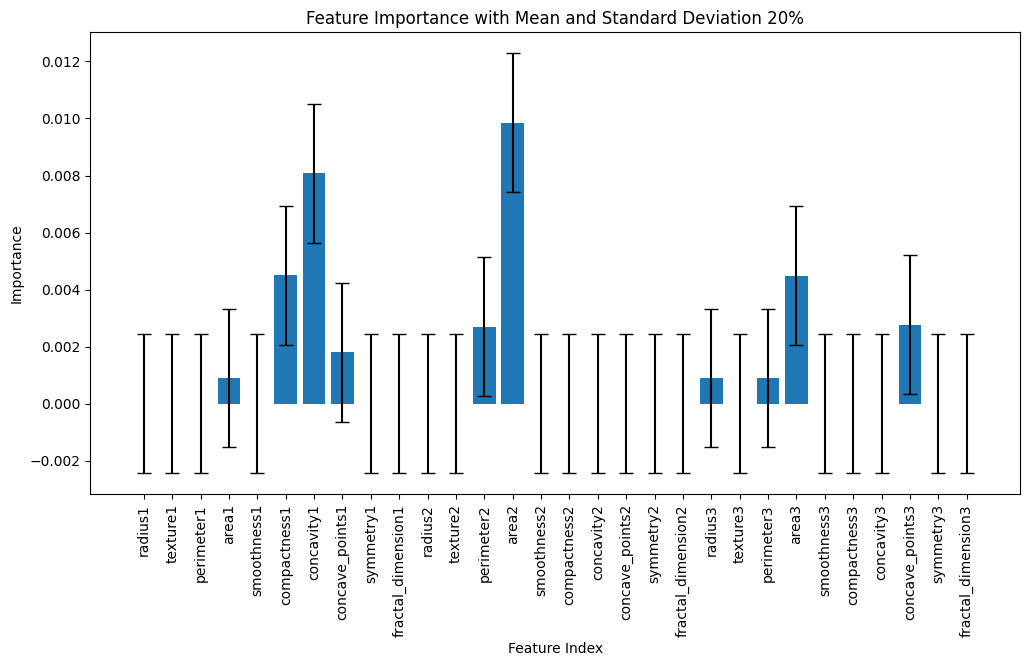

Mean Feature Importance for 20% with 5 folds: 0.0012294643878146242
Standard Deviation of Feature Importance for 20% with 5 folds: 0.002436313894157904


In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.inspection import permutation_importance


def feature_selection_evaluation(X, y, model, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average='weighted')

    feature_importances = np.zeros(X.shape[1])

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

#Calculate feature importance using permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring=f1_scorer)
    feature_importances += result.importances_mean

#Average the feature importances over the folds
    feature_importances /= n_splits

#Calculate mean and standard deviation of feature importances
    mean_importance = np.mean(feature_importances)
    std_importance = np.std(feature_importances)
    
    abs_mean = abs(result.importances_mean)
    sorted_idx = abs_mean.argsort()[::-1][:10]  # Sort in descending order and select top 10

# Plot the top 10 features
    plt.figure(figsize=(15, 6))
    plt.bar([X.columns[i] for i in sorted_idx], abs(result.importances_mean[sorted_idx]), yerr = std_importance, capsize = 5, color = "orange")
    plt.xlabel("Mean Permutation Importance")
    plt.title("Top 10 Feature Importances (Permutation Importance)")
    plt.show()

#Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(feature_importances)), feature_importances, yerr=std_importance, capsize=5)
    plt.xlabel("Feature Index")
    plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
    plt.ylabel("Importance")
    plt.title("Feature Importance with Mean and Standard Deviation 20%")
    plt.show()

    return feature_importances, mean_importance, std_importance

#Assuming tree_model is an instance of the DecisionTree class
X_eighty, X_twenty, y_eighty, y_twenty = train_test_split(X, y, test_size=0.2, random_state=42)
feature_importances_twenty, mean_importance_twenty, std_importance_twenty = feature_selection_evaluation(X_twenty, y_twenty, NaiveBayes(), 5)

print(f"Mean Feature Importance for 20% with 5 folds: {mean_importance_twenty}")
print(f"Standard Deviation of Feature Importance for 20% with 5 folds: {std_importance_twenty}")


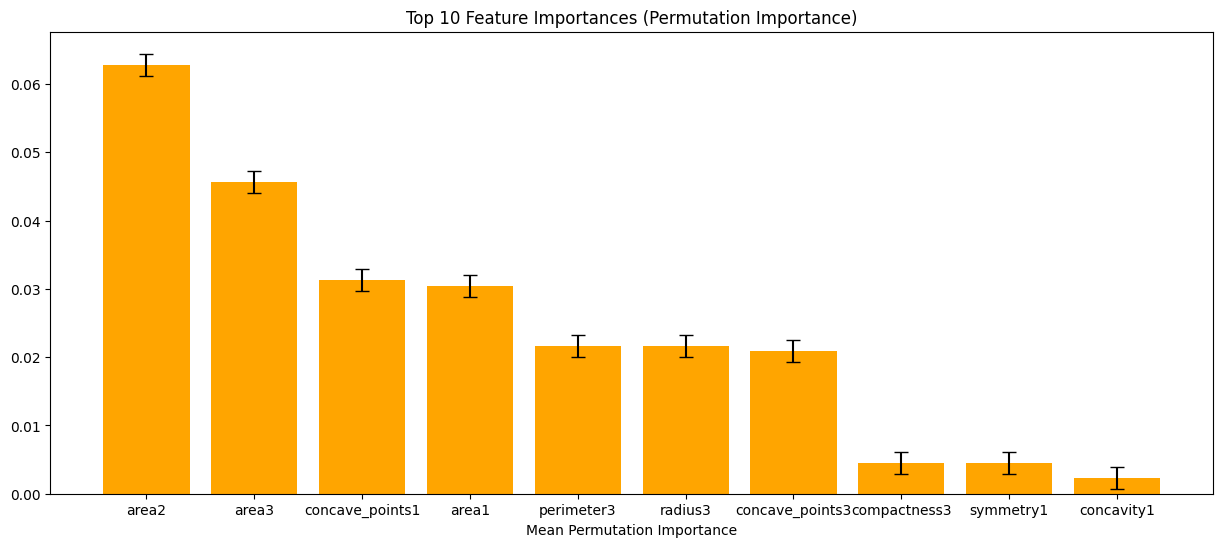

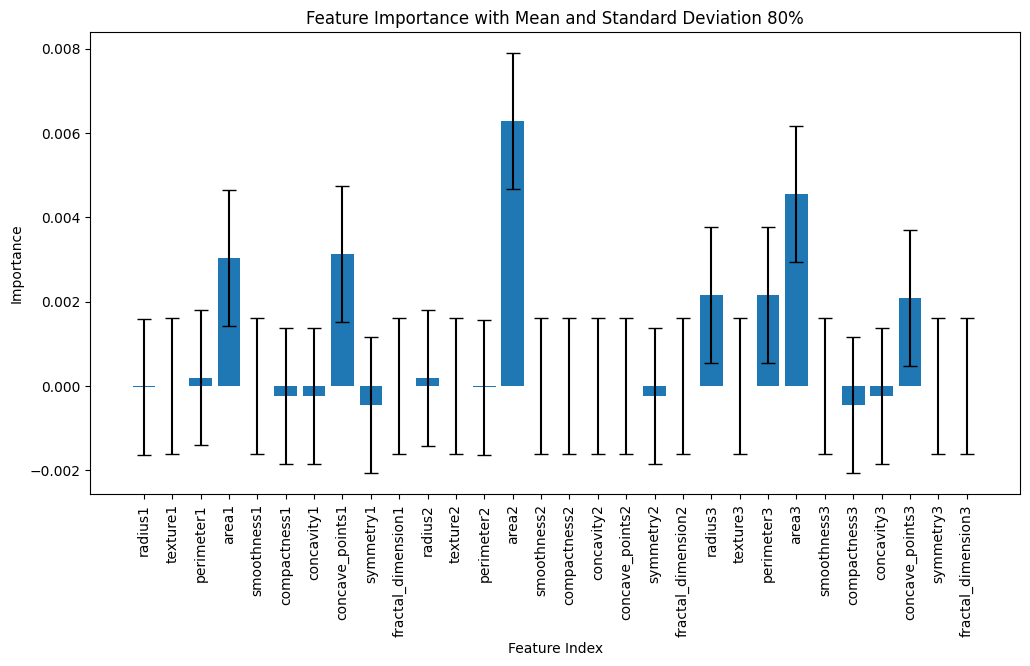

Mean feature importance for 80% with 10 folds: 0.0007322305348443094
standard deviation for 80% with 10 folds: 0.001609524876256917


In [35]:
def feature_selection_evaluation(X, y, model, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score, average='weighted')

    feature_importances = np.zeros(X.shape[1])

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

#Calculate feature importance using permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring=f1_scorer)
    feature_importances += result.importances_mean

#Average the feature importances over the folds
    feature_importances /= n_splits

#Calculate mean and standard deviation of feature importances
    mean_importance = np.mean(feature_importances)
    std_importance = np.std(feature_importances)
    
    abs_mean = abs(result.importances_mean)
    sorted_idx = abs_mean.argsort()[::-1][:10]  # Sort in descending order and select top 10

# Plot the top 10 features
    plt.figure(figsize=(15, 6))
    plt.bar([X.columns[i] for i in sorted_idx], abs(result.importances_mean[sorted_idx]), yerr = std_importance, capsize = 5, color = "orange")
    plt.xlabel("Mean Permutation Importance")
    plt.title("Top 10 Feature Importances (Permutation Importance)")
    plt.show()

#Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(feature_importances)), feature_importances, yerr=std_importance, capsize=5)
    plt.xlabel("Feature Index")
    plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
    plt.ylabel("Importance")
    plt.title("Feature Importance with Mean and Standard Deviation 80%")
    plt.show()

    return feature_importances, mean_importance, std_importance

feature_importances_eighty, mean_importance_eighty, std_importance_eighty = feature_selection_evaluation(X_eighty, y_eighty, NaiveBayes(), 10)
print(f"Mean feature importance for 80% with 10 folds: {mean_importance_eighty}")
print(f"standard deviation for 80% with 10 folds: {std_importance_eighty}")

## Q4 - Data augmentation using SMOTE

In [36]:
class NaiveBayes1:
    def fit(self, X, y):
        
        if not isinstance(X, np.ndarray):
            X = np.array(X, dtype=np.float64)
    # Check if y is a vertical (column) vector and flatten it if so
        if y.ndim == 2 and y.shape[1] == 1:
            y = np.ravel(y)
            self.classes = np.unique(y)
            self.parameters = {}
        # Calculate mean, variance, and prior for each class
            for c in self.classes:
            # Filter X for rows where y matches the class
                X_c = X[y == c]
                self.parameters[c] = {
                    'mean': X_c.mean(axis=0),
                    'var': X_c.var(axis=0) + 1e-6,  # small term to avoid division by zero
                    'prior': X_c.shape[0] / X.shape[0]
                }
# Converts y to 1D
        # Converts y to 1D if it’s not
        else:
            y = y['Diagnosis']
            self.classes = np.unique(y)
            self.parameters = {}

        # Calculate mean, variance, and prior for each class
            for c in self.classes:
            # Filter X for rows where y matches the class
                X_c = X[y == c]
                self.parameters[c] = {
                    'mean': X_c.mean(axis=0),
                    'var': X_c.var(axis=0) + 1e-6,  # small term to avoid division by zero
                    'prior': X_c.shape[0] / X.shape[0]
                }

    
    def gaussian(self, x, mean, var):
        
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var)
        exp = np.exp((-(x - mean) ** 2) / (2.0 * var))
        return coeff * exp
    
    def predict(self, X):
        
        predictions = []
        
        for x in X:  # Loop through each sample
            posteriors = []
            for c in self.classes:
                # Start with the prior probability of the class
                posterior = np.log(self.parameters[c]['prior']) 
                
                # Compute the log likelihood for each feature and add to posterior
                mean = self.parameters[c]['mean']
                var = self.parameters[c]['var']
                posterior += np.sum(np.log(self.gaussian(x, mean, var)))
                
                posteriors.append(posterior)
            
            # Choose the class with the highest posterior probability
            predictions.append(self.classes[np.argmax(posteriors)])
        
        return np.array(predictions)

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import randrange, uniform

X = np.array(X)
y = np.array(y)

def smote(samples: np.array, N: int, k: int) -> np.array:
    
    num_samples, num_features = samples.shape
    
    # Calculate the number of synthetic samples to create
    if N < 100:
        num_samples = int(N / 100 * num_samples)
        N = 100
    N = int(N / 100)  
    
    # Initialize an array to store synthetic samples
    synthetic_samples = np.zeros((num_samples * N, num_features))
    new_index = 0
    
    # Fit the nearest neighbors model
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(samples)
    
    # Generate synthetic samples
    for i in range(num_samples):
        nn_array = nbrs.kneighbors([samples[i]], return_distance=False)[0]
        
        # Skip the first nearest neighbor.
        nn_array = nn_array[1:]
        
        for _ in range(N):
            # Randomly choose one of the neighbors
            nn = randrange(len(nn_array))  
            neighbor = samples[nn_array[nn]] #come back to this
            
            # Create synthetic sample by interpolating between the sample and its neighbor
            for feature in range(num_features):
                diff = neighbor[feature] - X[i][feature]
                gap = uniform(0, 1)
                synthetic_samples[new_index][feature] = samples[i][feature] + gap * diff
            
            new_index += 1

    return synthetic_samples


In [48]:
minority_samples = X[np.where(y == "M")[0]]

synthetic_samples_1_100 = smote(minority_samples, N=100, k=1)
synthetic_samples_1_200 = smote(minority_samples, N=200, k=1)
synthetic_samples_1_300 = smote(minority_samples, N=300, k=1)    
synthetic_samples_5_100 = smote(minority_samples, N=100, k=5)
synthetic_samples_5_200 = smote(minority_samples, N=200, k=5)
synthetic_samples_5_300 = smote(minority_samples, N=300, k=5)        

print("Synthetic Samples:\n", synthetic_samples_1_100)

Synthetic Samples:
 [[1.84603757e+01 1.15359510e+01 1.22828225e+02 ... 2.16314940e-01
  4.04963076e-01 1.07909451e-01]
 [2.06251048e+01 1.76598928e+01 1.33381871e+02 ... 1.92424949e-01
  2.69865140e-01 7.21005029e-02]
 [2.00947473e+01 2.59385207e+01 1.30638658e+02 ... 2.20459090e-01
  3.52647766e-01 8.58663206e-02]
 ...
 [2.44975962e+01 3.14616896e+01 1.33095888e+02 ... 1.99475452e-01
  3.88689690e-01 6.67780858e-02]
 [1.33782451e+01 2.90579953e+01 9.48517044e+01 ... 1.71759377e-01
  2.51949964e-01 1.00346097e-01]
 [2.55742807e+01 3.32614027e+01 1.50312786e+02 ... 3.41437208e-01
  4.33121962e-01 1.24022550e-01]]


In [49]:
# Concatenate the original X with the synthetic samples
synthetic_X_1_100 = np.vstack((X, synthetic_samples_1_100))
synthetic_y_1_100 = np.vstack((y, np.array(["M"] * len(synthetic_samples_1_100)).reshape(-1,1)))

synthetic_X_1_200 = np.vstack((X, synthetic_samples_1_200))
synthetic_y_1_200 = np.vstack((y, np.array(["M"] * len(synthetic_samples_1_200)).reshape(-1,1)))

synthetic_X_1_300 = np.vstack((X, synthetic_samples_1_300))
synthetic_y_1_300 = np.vstack((y, np.array(["M"] * len(synthetic_samples_1_300)).reshape(-1,1)))

synthetic_X_5_100 = np.vstack((X, synthetic_samples_5_100))
synthetic_y_5_100 = np.vstack((y, np.array(["M"] * len(synthetic_samples_5_100)).reshape(-1,1)))

synthetic_X_5_200 = np.vstack((X, synthetic_samples_5_200))
synthetic_y_5_200 = np.vstack((y, np.array(["M"] * len(synthetic_samples_5_200)).reshape(-1,1)))

synthetic_X_5_300 = np.vstack((X, synthetic_samples_5_300))
synthetic_y_5_300 = np.vstack((y, np.array(["M"] * len(synthetic_samples_5_300)).reshape(-1,1)))

In [52]:
# printing functions
tree_model = DecisionTree(max_depth=12, min_samples_split=2)
mean_f1_tree_smote_1_100, std_f1_tree_smote_1_100 = evaluate_and_plot(tree_model, synthetic_X_1_100, synthetic_y_1_100)
mean_f1_tree_smote_1_200, std_f1_tree_smote_1_200 = evaluate_and_plot(tree_model, synthetic_X_1_200, synthetic_y_1_200)
mean_f1_tree_smote_1_300, std_f1_tree_smote_1_300 = evaluate_and_plot(tree_model, synthetic_X_1_300, synthetic_y_1_300)
mean_f1_tree_smote_5_100, std_f1_tree_smote_5_100 = evaluate_and_plot(tree_model, synthetic_X_5_100, synthetic_y_5_100)
mean_f1_tree_smote_5_200, std_f1_tree_smote_5_200 = evaluate_and_plot(tree_model, synthetic_X_5_200, synthetic_y_5_200)
mean_f1_tree_smote_5_300, std_f1_tree_smote_5_300 = evaluate_and_plot(tree_model, synthetic_X_5_300, synthetic_y_5_300)


nb = NaiveBayes1()
mean_f1_nb_smote_1_100, std_f1_nb_smote_1_100 = evaluate_and_plot(nb, synthetic_X_1_100, synthetic_y_1_100)
mean_f1_nb_smote_1_200, std_f1_nb_smote_1_200 = evaluate_and_plot(nb, synthetic_X_1_200, synthetic_y_1_200)
mean_f1_nb_smote_1_300, std_f1_nb_smote_1_300 = evaluate_and_plot(nb, synthetic_X_1_300, synthetic_y_1_300)
mean_f1_nb_smote_5_100, std_f1_nb_smote_5_100 = evaluate_and_plot(nb, synthetic_X_5_100, synthetic_y_5_100)
mean_f1_nb_smote_5_200, std_f1_nb_smote_5_200 = evaluate_and_plot(nb, synthetic_X_5_200, synthetic_y_5_200)
mean_f1_nb_smote_5_300, std_f1_nb_smote_5_300 = evaluate_and_plot(nb, synthetic_X_5_300, synthetic_y_5_300)

print(f"Decision Tree Mean F1 Score: {mean_f1_tree_smote_1_100}")
print(f"Decision Tree Standard Deviation of F1 Score: {std_f1_tree_smote_1_100}")
print(f"Naive Bayes Mean F1 Score: {mean_f1_nb_smote_1_100}")
print(f"Naive Bayes Standard Deviation of F1 Score: {std_f1_nb_smote_1_100}")

Decision Tree Mean F1 Score: 0.9345547956900726
Decision Tree Standard Deviation of F1 Score: 0.02254344896059045
Naive Bayes Mean F1 Score: 0.9283835375351582
Naive Bayes Standard Deviation of F1 Score: 0.01827482109129449


/var/folders/w8/x281695s765c4tnpphv204d80000gn/T/ipykernel_64173/811830349.py:57: RuntimeWarning: divide by zero encountered in log
  posterior += np.sum(np.log(self.gaussian(x, mean, var)))
/var/folders/w8/x281695s765c4tnpphv204d80000gn/T/ipykernel_64173/811830349.py:57: RuntimeWarning: divide by zero encountered in log
  posterior += np.sum(np.log(self.gaussian(x, mean, var)))
/var/folders/w8/x281695s765c4tnpphv204d80000gn/T/ipykernel_64173/811830349.py:57: RuntimeWarning: divide by zero encountered in log
  posterior += np.sum(np.log(self.gaussian(x, mean, var)))
/var/folders/w8/x281695s765c4tnpphv204d80000gn/T/ipykernel_64173/811830349.py:57: RuntimeWarning: divide by zero encountered in log
  posterior += np.sum(np.log(self.gaussian(x, mean, var)))
/var/folders/w8/x281695s765c4tnpphv204d80000gn/T/ipykernel_64173/811830349.py:57: RuntimeWarning: divide by zero encountered in log
  posterior += np.sum(np.log(self.gaussian(x, mean, var)))
/var/folders/w8/x281695s765c4tnpphv204d80000g

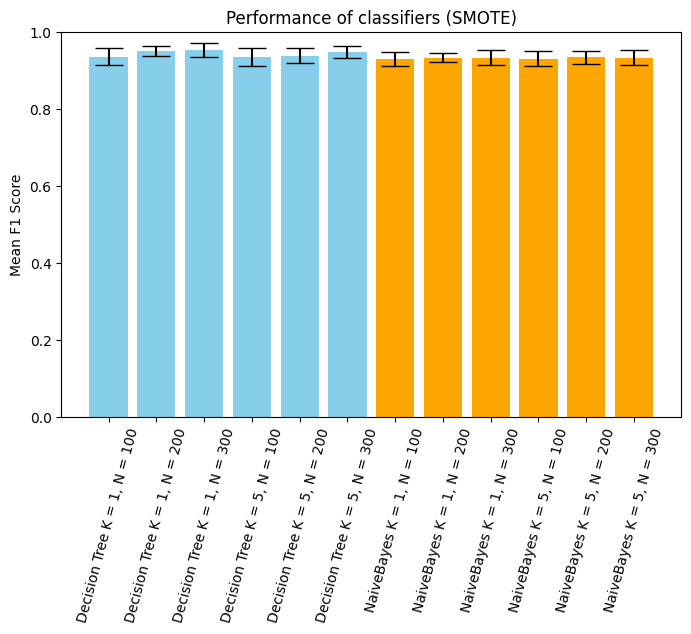

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(['Decision Tree K = 1, N = 100'], [mean_f1_tree_smote_1_100], yerr=[std_f1_tree_smote_1_100], capsize=10, color='skyblue')
plt.bar(['Decision Tree K = 1, N = 200'], [mean_f1_tree_smote_1_200], yerr=[std_f1_tree_smote_1_200], capsize=10, color='skyblue')
plt.bar(['Decision Tree K = 1, N = 300'], [mean_f1_tree_smote_1_300], yerr=[std_f1_tree_smote_1_300], capsize=10, color='skyblue')
plt.bar(['Decision Tree K = 5, N = 100'], [mean_f1_tree_smote_5_100], yerr=[std_f1_tree_smote_5_100], capsize=10, color='skyblue')
plt.bar(['Decision Tree K = 5, N = 200'], [mean_f1_tree_smote_5_200], yerr=[std_f1_tree_smote_5_200], capsize=10, color='skyblue')
plt.bar(['Decision Tree K = 5, N = 300'], [mean_f1_tree_smote_5_300], yerr=[std_f1_tree_smote_5_300], capsize=10, color='skyblue')
plt.bar(['NaiveBayes K = 1, N = 100'], mean_f1_nb_smote_1_100, yerr=std_f1_nb_smote_1_100, capsize = 10, color = 'orange')
plt.bar(['NaiveBayes K = 1, N = 200'], mean_f1_nb_smote_1_200, yerr=std_f1_nb_smote_1_200, capsize = 10, color = 'orange')
plt.bar(['NaiveBayes K = 1, N = 300'], mean_f1_nb_smote_1_300, yerr=std_f1_nb_smote_1_300, capsize = 10, color = 'orange')
plt.bar(['NaiveBayes K = 5, N = 100'], mean_f1_nb_smote_5_100, yerr=std_f1_nb_smote_5_100, capsize = 10, color = 'orange')
plt.bar(['NaiveBayes K = 5, N = 200'], mean_f1_nb_smote_5_200, yerr=std_f1_nb_smote_5_200, capsize = 10, color = 'orange')
plt.bar(['NaiveBayes K = 5, N = 300'], mean_f1_nb_smote_5_300, yerr=std_f1_nb_smote_5_300, capsize = 10, color = 'orange')
plt.ylabel('Mean F1 Score')
plt.title(f'Performance of classifiers (SMOTE)')
plt.xticks(rotation=75)
plt.ylim(0, 1)
plt.show()

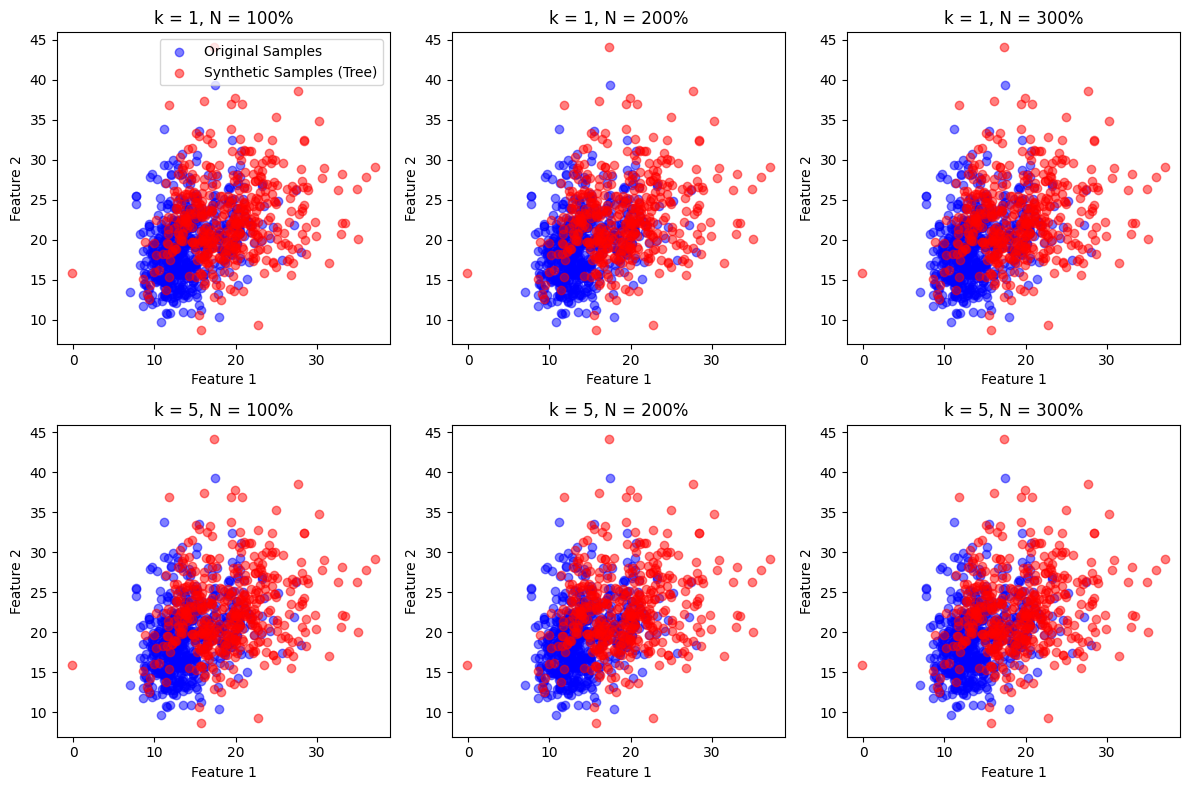

In [67]:
X = np.array(X)  

# Defining the values for k and N
k_values = [1, 5]
N_values = [100, 200, 300]

# Plot SMOTE results for the different K, N values.
plt.figure(figsize=(12, 8))
plot_number = 1

for k in k_values:
    for N in N_values:
            
        synthetic_samples = smote(X, N, k)
        
        # Plot the results
        plt.subplot(len(k_values), len(N_values), plot_number)
        plt.scatter(X[:, 0], X[:, 1], label='Original Samples', alpha=0.5, color='blue')
        plt.scatter(synthetic_samples_5_200[:, 0], synthetic_samples_5_200[:, 1], label='Synthetic Samples (Tree)', alpha=0.5, color='red')
        plt.title(f'k = {k}, N = {N}%')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
                
        if plot_number == 1:  
            plt.legend(loc='upper right')
                
        plot_number += 1

        # Plot
plt.tight_layout()
plt.show()
        

            

## References:
https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17

https://medium.com/@enozeren/building-a-decision-tree-from-scratch-324b9a5ed836

https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html

https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

https://scikit-learn.org/1.5/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

https://numpy.org/devdocs/reference/routines.linalg.html

https://www.google.com/search?q=svd+code+in+python+medium&sca_esv=da0068da29b6c6ff&rlz=1C5CHFA_enUS1086US1087&ei=_TglZ4fFCc6hkPIP2JfnyAw&oq=svd+code+in+python+mediu&gs_lp=Egxnd3Mtd2l6LXNlcnAiGHN2ZCBjb2RlIGluIHB5dGhvbiBtZWRpdSoCCAAyBRAhGKABSMEbUPUDWIUPcAF4AZABAJgBYqABjgSqAQE2uAEDyAEA-AEBmAIHoAKzBMICChAAGLADGNYEGEfCAgYQABgWGB7CAgsQABiABBiGAxiKBcICCBAAGIAEGKIEwgIFECEYnwWYAwCIBgGQBgiSBwM2LjGgB9oa&sclient=gws-wiz-serp

https://medium.com/@omidsaghatchian/decision-tree-implementation-from-scratch-visualization-5eb0bbf427c2